<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/Plot_Diagram_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code is used to demonstrate the result of hypergraph rumor spread on a network. In this example, the network size is 400, with degree exponent of 2.5, and minimum degree of 3. The number of hyperedges (groups) is set to 100. The heatmap shows the stifler density with varying transmission rate while setting the threshold constant to 0.

In [1]:
# Plot the hypergraph
#!pip install hypernetx
import hypernetx as hnx

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random
import math as math
from math import log
import seaborn as sns
import pandas as pd

## Part 1: Hypergraph Generation
The following steps generate a hyper graph using the XGI/HyperNetX python package,  following power-law degree distribution for predifined number of nodes n, number of hyperedges num_hyper_edges, degree exponent gamma, using a configuration model with data stored in a dictionary.

In [3]:
# Step 1: Generate Degree Sequence
def generate_degree_sequence(n, gamma, kmin):
    # Generate a random set from the power law distribution
    u = np.random.uniform(size=n)
    degrees = np.ceil((1.0 - u) ** (-1.0 / (gamma - 1.0)))

    # Adjust degrees based on the minimum and maximum degree values
    kmax = int(np.sqrt(n))
    # kmax = int(1.5*n**(1/4)) # max degree allowed is 1.5*n^(1/4)
    degrees = degrees[(degrees >= kmin) & (degrees <= kmax)].astype(int)

    # Truncate or pad the sequence to match the length specified
    if len(degrees) >= n:
        degrees = degrees[:n]
    else:
        degrees = np.concatenate((degrees, np.full(n - len(degrees), kmin)))

    return degrees.tolist()

# Step 2: Generate Hyper Edge Size Sequence
def generate_hyper_edge_sizes(degrees, num_hyper_edges):
    total_degrees = sum(degrees)
    hyper_edge_sizes = []

    # Calculate the average size for each hyper edge
    avg_size = total_degrees // num_hyper_edges
    remainder = total_degrees % num_hyper_edges

    # Define the range for the random distribution
    min_size = 1  # Lower bound of the range
    max_size = len(degrees)-num_hyper_edges  # Upper bound of the range

    # Generate hyper edge sizes
    for _ in range(num_hyper_edges):
        size = random.randint(min_size, max_size)
        hyper_edge_sizes.append(size)

    return hyper_edge_sizes


# Step 3: Create Copies of Nodes
def create_node_copies(degrees):
    node_copies = []
    for i, degree in enumerate(degrees):
        for _ in range(degree):
            node_copies.append(i)
    return node_copies

# Step 4: Create Copies of Hyper Edges
def create_hyper_edge_copies(hyper_edge_sizes):
    hyper_edge_copies = []
    for i, size in enumerate(hyper_edge_sizes):
        for _ in range(size):
            hyper_edge_copies.append(i)
    return hyper_edge_copies

# Step 5: Randomly Pair Copies
def randomly_pair_copies(node_copies, hyper_edge_copies):
    random.shuffle(node_copies)
    random.shuffle(hyper_edge_copies)
    pairs = []
    for i in range(len(node_copies)):
        pairs.append((node_copies[i], hyper_edge_copies[i]))
    return pairs

# Step 6: Convert Bipartite Graph to A Hypergraph Dictionary
def convert_to_hypergraph(pairs):
    hypergraph = {}
    for pair in pairs:
        node, hyper_edge = pair
        if hyper_edge in hypergraph:
            hypergraph[hyper_edge].append(node)
        else:
            hypergraph[hyper_edge] = [node]
    return hypergraph


In [4]:
def build_hypergraph(n, gamma, kmin, num_hyper_edges):
    # Step 1: Generate Degree Sequence
    degrees = generate_degree_sequence(n, gamma, kmin)
    print("Degree Sequence: ", degrees)

    # Step 2: Generate Hyper Edge Size Sequence
    hyper_edge_sizes = generate_hyper_edge_sizes(degrees, num_hyper_edges)
    print("Hyper Edge Sizes: ", hyper_edge_sizes)

    # Step 3: Create Copies of Nodes
    node_copies = create_node_copies(degrees)

    # Step 4: Create Copies of Hyper Edges
    hyper_edge_copies = create_hyper_edge_copies(hyper_edge_sizes)

    # Step 5: Randomly Pair Copies
    pairs = randomly_pair_copies(node_copies, hyper_edge_copies)

    # Step 6: Convert Bipartite Graph to Hypergraph
    hyperedge_dict = convert_to_hypergraph(pairs)

    # Print the resulting hypergraph
    print("Hypergraph Dictionary: ", hyperedge_dict)

    return degrees, hyperedge_dict


Degree Sequence:  [4, 7, 3, 4, 3, 3, 3, 7, 4, 5, 3, 3, 4, 4, 4, 3, 7, 4, 4, 8, 3, 5, 5, 4, 6, 3, 4, 4, 3, 4, 3, 4, 4, 4, 3, 4, 7, 5, 3, 3, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Hyper Edge Sizes:  [28, 70, 11, 34, 31, 15, 38, 13, 57, 74, 5, 78, 66, 77, 66, 75, 38, 55, 28, 18]
Hypergraph Dictionary:  {1: [29, 68, 22, 3, 35, 57, 80, 56, 29, 40, 95, 37, 7, 96, 62, 29, 12, 4, 51, 1, 26, 75, 96, 30, 79, 24, 63, 28, 1, 84], 9: [24, 21, 94, 10, 9, 32, 8, 25, 72, 16, 85, 41, 36, 17, 92, 87, 89, 36, 19, 78, 71, 46, 71, 19, 53, 7], 4: [89, 99, 94, 86, 95, 17, 94, 88, 35, 91, 19, 14, 14], 0: [97, 19, 83, 70, 0, 82, 2, 65], 13: [71, 40, 77, 16, 74, 47, 51, 62, 76, 88, 40, 2, 1, 65, 54, 73, 48, 36, 34, 21, 12, 39, 7, 56, 69, 1, 78, 87, 95, 48, 31, 45, 42, 7, 54, 79], 8: [38, 58, 5, 14, 38, 27, 26, 24, 1, 60, 25, 22, 60, 80, 10, 8, 83, 58, 66, 99, 16], 12: [13,

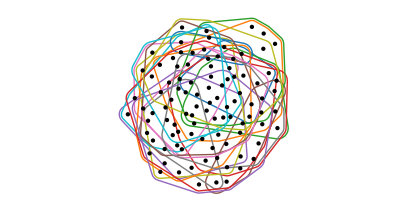

In [21]:
# Test 2
n2 =100  # Number of nodes
gamma2 = 2.5  # Power-law exponent
kmin2 = 3  # Minimum degree
num_hyper_edges2 = 20  # Desired number of hyper edges

degrees2, hyperedge_dict2 = build_hypergraph(n2, gamma2, kmin2, num_hyper_edges2)
H2 = hnx.Hypergraph(hyperedge_dict2)

plt.subplots(figsize=(5,2.5))
hnx.draw(H2, with_edge_labels=False, with_node_labels=False)

Degree Sequence:  [3, 4, 5, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Hyper Edge Sizes:  [15, 34, 6, 51, 21, 70, 48, 40, 51, 50, 50, 31, 29, 20, 50, 74, 38, 48, 48, 21]
Hypergraph Dictionary:  {14: [20, 47, 51, 39, 55, 29, 68, 52, 66, 62, 85, 99, 99, 97, 83, 71], 7: [31, 82, 55, 65, 61, 73, 89, 70, 41, 4, 92, 72, 11, 83, 26, 35], 3: [83, 12, 97, 49, 91, 70, 35, 9, 5, 76, 50, 17, 78, 25, 6, 86, 27, 38, 16, 23, 57], 9: [8, 2, 30, 88, 92, 9, 81, 65, 75, 12, 54, 60, 8, 54, 18, 42, 11, 34, 33, 28], 18: [0, 38, 89, 72, 90, 8, 77, 91, 17, 78, 37, 18, 87, 75, 12, 96, 88, 82, 50, 21, 95, 14], 8: [48, 50, 16, 1, 24, 3, 74, 84, 18, 5, 16, 56, 63, 21, 31, 68, 47, 0, 30, 94, 51, 60, 29], 17: [0, 31, 58, 84, 23, 25, 22, 57, 29, 84, 79, 20, 98, 66, 76, 6, 

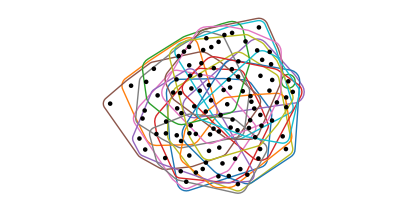

In [22]:
# Test 3
n3 =100  # Number of nodes
gamma3 = 3.0  # Power-law exponent
kmin3 = 3  # Minimum degree
num_hyper_edges3 = 20  # Desired number of hyper edges

degrees3, hyperedge_dict3 = build_hypergraph(n3, gamma3, kmin3, num_hyper_edges3)
H3 = hnx.Hypergraph(hyperedge_dict3)

plt.subplots(figsize=(5,2.5))
hnx.draw(H3, with_edge_labels=False, with_node_labels=False)